<h1>EDA Notebook - 1

In [ ]:
![Alt text](https://github.com/AFARNOOD/BIXI_2022-Project/blob/main/imgs/Picture2.jpg)

<h2>Preparing the Data

<h3>Import Libraries

The following code is written in Python 3.7. Below is the list of libraries used.

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import itertools
import copy
import csv
import openpyxl


<h3>Load Data Modeling Libraries

These are the most common machine learning and data visualization libraries.

In [2]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Common Model Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


#Common Model Helpers
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

<h3> Data Set Restructuring

In [9]:
# read BIXI data set
dfBIXI = pd.read_csv('DonneesOuverte2022.csv')

In [10]:
dfBIXI

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS
0,St-Urbain / René-Lévesque,Ville-Marie,45.507838,-73.563136,Mansfield / Ste-Catherine,Ville-Marie,45.501399,-73.571786,1653343831220,1.653344e+12
1,Roy / St-Laurent,Le Plateau-Mont-Royal,45.515616,-73.575808,Dorion / Rachel,Le Plateau-Mont-Royal,45.531634,-73.568246,1653343831410,1.653345e+12
2,Lajeunesse / Villeray,Villeray - Saint-Michel - Parc-Extension,45.542119,-73.622547,Leman / de Chateaubriand,Villeray - Saint-Michel - Parc-Extension,45.547218,-73.631103,1653343832935,1.653344e+12
3,Parc Plage,Ville-Marie,45.502828,-73.527793,de la Commune / King,Ville-Marie,45.497515,-73.552571,1653343837732,1.653347e+12
4,Marie-Anne / de la Roche,Le Plateau-Mont-Royal,45.527758,-73.576185,Métro Laurier (Bibaud / Rivard),Le Plateau-Mont-Royal,45.527839,-73.589575,1653343832286,1.653344e+12
...,...,...,...,...,...,...,...,...,...,...
8967922,St-Charles / Thomas-Keefer,Le Sud-Ouest,45.477605,-73.573775,de la Commune / St-Sulpice,Ville-Marie,45.504242,-73.553470,1661014205935,1.661016e+12
8967923,de Lanaudière / Laurier,Le Plateau-Mont-Royal,45.533314,-73.583737,Duluth / St-Laurent,Le Plateau-Mont-Royal,45.516876,-73.579460,1661014216698,1.661015e+12
8967924,de Bordeaux / Marie-Anne,Le Plateau-Mont-Royal,45.533409,-73.570657,Gauthier / Papineau,Le Plateau-Mont-Royal,45.529666,-73.567336,1661014214254,1.661014e+12
8967925,Prince-Arthur / du Parc,Le Plateau-Mont-Royal,45.510590,-73.575470,Vallières / St-Laurent,Le Plateau-Mont-Royal,45.518967,-73.583616,1661014213535,1.661015e+12


In [11]:
# read Temparature data set
dfTEMP = pd.read_csv('Montreal_weather-2022.csv')

In [12]:
dfTEMP

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,12/31/2022,7.2,5.94,5.25,3.3,NaN,NaN,100,99.6,98.5,...,NaN,NaN,8,7.3,6.0,4,NaN,NaN,NaN,NaN
1,12/30/2022,8.6,6.32,6.25,3.9,NaN,NaN,96,86.7,88.0,...,NaN,NaN,8,8.0,8.0,8,NaN,NaN,NaN,NaN
2,12/29/2022,6.3,1.17,0.64,-5.0,NaN,-8.0,94,83.1,80.5,...,NaN,NaN,8,7.8,6.5,5,NaN,NaN,NaN,NaN
3,12/28/2022,0.0,-2.04,-2.00,-4.0,NaN,-10.0,94,87.8,87.0,...,NaN,NaN,8,7.5,6.0,4,NaN,NaN,NaN,NaN
4,12/27/2022,-3.4,-6.22,-6.65,-9.9,NaN,-16.0,87,77.1,77.0,...,NaN,NaN,8,7.8,6.5,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1/5/2022,2.0,-3.05,-2.54,-7.1,NaN,-13.0,94,81.7,84.0,...,NaN,NaN,8,7.3,4.5,1,NaN,NaN,NaN,NaN
361,1/4/2022,-2.9,-8.36,-10.30,-17.7,NaN,-25.0,83,76.3,75.0,...,NaN,NaN,8,7.3,5.0,2,NaN,NaN,NaN,NaN
362,1/3/2022,-13.6,-16.14,-17.00,-20.4,NaN,-26.0,83,72.6,72.5,...,NaN,NaN,6,2.0,3.0,0,NaN,NaN,NaN,NaN
363,1/2/2022,-2.4,-8.12,-8.69,-15.0,NaN,-21.0,89,78.3,78.5,...,NaN,NaN,8,6.5,4.0,0,NaN,NaN,NaN,NaN


**Organazing BIXI Data**

In [13]:
# Assuming your DataFrame is named df and the "time" column is in milliseconds
# Replace 'your_time_column' with the actual name of your "time" column

# Convert milliseconds to datetime
dfBIXI['datetime'] = pd.to_datetime(dfBIXI['STARTTIMEMS'], unit='ms')

# Extract year, day, and hour into separate columns
dfBIXI['year'] = dfBIXI['datetime'].dt.year
dfBIXI['month'] = dfBIXI['datetime'].dt.month
dfBIXI['day'] = dfBIXI['datetime'].dt.day
dfBIXI['hour'] = dfBIXI['datetime'].dt.hour

# Drop the original "time" and "datetime" columns if needed
dfBIXI = dfBIXI.drop([ 'datetime'], axis=1)

# Display the updated DataFrame
dfBIXI.head()

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS,year,month,day,hour
0,St-Urbain / René-Lévesque,Ville-Marie,45.507838,-73.563136,Mansfield / Ste-Catherine,Ville-Marie,45.501399,-73.571786,1653343831220,1.653344e+12,2022,5,23,22
1,Roy / St-Laurent,Le Plateau-Mont-Royal,45.515616,-73.575808,Dorion / Rachel,Le Plateau-Mont-Royal,45.531634,-73.568246,1653343831410,1.653345e+12,2022,5,23,22
2,Lajeunesse / Villeray,Villeray - Saint-Michel - Parc-Extension,45.542119,-73.622547,Leman / de Chateaubriand,Villeray - Saint-Michel - Parc-Extension,45.547218,-73.631103,1653343832935,1.653344e+12,2022,5,23,22
3,Parc Plage,Ville-Marie,45.502828,-73.527793,de la Commune / King,Ville-Marie,45.497515,-73.552571,1653343837732,1.653347e+12,2022,5,23,22
4,Marie-Anne / de la Roche,Le Plateau-Mont-Royal,45.527758,-73.576185,Métro Laurier (Bibaud / Rivard),Le Plateau-Mont-Royal,45.527839,-73.589575,1653343832286,1.653344e+12,2022,5,23,22


**Organasing Montreal Temparature Data**

In [14]:
# Assuming TEMPdf is your DataFrame
# Convert the 'date' column to datetime format
dfTEMP['date'] = pd.to_datetime(dfTEMP['date'], format='%m/%d/%Y')

# Create new columns 'TEMPyear', 'TEMPmonth', 'TEMPday'
dfTEMP['year'] = dfTEMP['date'].dt.year
dfTEMP['month'] = dfTEMP['date'].dt.month
dfTEMP['day'] = dfTEMP['date'].dt.day

# Display the updated DataFrame
dfTEMP.head()

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10,year,month,day
0,2022-12-31,7.2,5.94,5.25,3.3,NaN,NaN,100,99.6,98.5,...,7.3,6.0,4,NaN,NaN,NaN,NaN,2022,12,31
1,2022-12-30,8.6,6.32,6.25,3.9,NaN,NaN,96,86.7,88.0,...,8.0,8.0,8,NaN,NaN,NaN,NaN,2022,12,30
2,2022-12-29,6.3,1.17,0.64,-5.0,NaN,-8.0,94,83.1,80.5,...,7.8,6.5,5,NaN,NaN,NaN,NaN,2022,12,29
3,2022-12-28,0.0,-2.04,-2.00,-4.0,NaN,-10.0,94,87.8,87.0,...,7.5,6.0,4,NaN,NaN,NaN,NaN,2022,12,28
4,2022-12-27,-3.4,-6.22,-6.65,-9.9,NaN,-16.0,87,77.1,77.0,...,7.8,6.5,5,NaN,NaN,NaN,NaN,2022,12,27


**Merge Data sets**

Merge the two datasets based on the 'Year', 'Month', and 'Day' columns

In [15]:
# Assuming dfBIXI and dfTEMP are your datasets
# Replace 'TEMPyear', 'TEMPmonth', 'TEMPday' with the actual columns names you want to merge on

# Merge the two datasets on the specified columns
merged_df = pd.merge(dfBIXI, dfTEMP[['year', 'month', 'day', 'avg_temperature', 'avg_wind_speed', 'avg_dew_point', 'rain', 'snow', 'snow_on_ground']], 
                     how='left', on=['year', 'month', 'day'])

# Display the merged DataFrame
print(merged_df.head())

            STARTSTATIONNAME                STARTSTATIONARRONDISSEMENT  \
0  St-Urbain / René-Lévesque                               Ville-Marie   
1           Roy / St-Laurent                     Le Plateau-Mont-Royal   
2      Lajeunesse / Villeray  Villeray - Saint-Michel - Parc-Extension   
3                 Parc Plage                               Ville-Marie   
4   Marie-Anne / de la Roche                     Le Plateau-Mont-Royal   

   STARTSTATIONLATITUDE  STARTSTATIONLONGITUDE  \
0             45.507838             -73.563136   
1             45.515616             -73.575808   
2             45.542119             -73.622547   
3             45.502828             -73.527793   
4             45.527758             -73.576185   

                    ENDSTATIONNAME                  ENDSTATIONARRONDISSEMENT  \
0        Mansfield / Ste-Catherine                               Ville-Marie   
1                  Dorion / Rachel                     Le Plateau-Mont-Royal   
2         Lema

In [16]:
merged_df.head()

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS,year,month,day,hour,avg_temperature,avg_wind_speed,avg_dew_point,rain,snow,snow_on_ground
0,St-Urbain / René-Lévesque,Ville-Marie,45.507838,-73.563136,Mansfield / Ste-Catherine,Ville-Marie,45.501399,-73.571786,1653343831220,1.653344e+12,2022,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN
1,Roy / St-Laurent,Le Plateau-Mont-Royal,45.515616,-73.575808,Dorion / Rachel,Le Plateau-Mont-Royal,45.531634,-73.568246,1653343831410,1.653345e+12,2022,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN
2,Lajeunesse / Villeray,Villeray - Saint-Michel - Parc-Extension,45.542119,-73.622547,Leman / de Chateaubriand,Villeray - Saint-Michel - Parc-Extension,45.547218,-73.631103,1653343832935,1.653344e+12,2022,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN
3,Parc Plage,Ville-Marie,45.502828,-73.527793,de la Commune / King,Ville-Marie,45.497515,-73.552571,1653343837732,1.653347e+12,2022,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN
4,Marie-Anne / de la Roche,Le Plateau-Mont-Royal,45.527758,-73.576185,Métro Laurier (Bibaud / Rivard),Le Plateau-Mont-Royal,45.527839,-73.589575,1653343832286,1.653344e+12,2022,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN


In [17]:
num_rows = merged_df.shape[0]
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 8967927 rows.


In [18]:
df = merged_df

In [19]:
# Assuming df is your DataFrame
df['TRIPDURATION'] = (df['ENDTIMEMS'] - df['STARTTIMEMS']) / 1000  # Convert milliseconds to seconds

# Display the updated DataFrame
print(df.head())

            STARTSTATIONNAME                STARTSTATIONARRONDISSEMENT  \
0  St-Urbain / René-Lévesque                               Ville-Marie   
1           Roy / St-Laurent                     Le Plateau-Mont-Royal   
2      Lajeunesse / Villeray  Villeray - Saint-Michel - Parc-Extension   
3                 Parc Plage                               Ville-Marie   
4   Marie-Anne / de la Roche                     Le Plateau-Mont-Royal   

   STARTSTATIONLATITUDE  STARTSTATIONLONGITUDE  \
0             45.507838             -73.563136   
1             45.515616             -73.575808   
2             45.542119             -73.622547   
3             45.502828             -73.527793   
4             45.527758             -73.576185   

                    ENDSTATIONNAME                  ENDSTATIONARRONDISSEMENT  \
0        Mansfield / Ste-Catherine                               Ville-Marie   
1                  Dorion / Rachel                     Le Plateau-Mont-Royal   
2         Lema

<h3> <font color= black></font> Greet the Data
    <h4> Import the Data

In [20]:
# read data set
df

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS,...,month,day,hour,avg_temperature,avg_wind_speed,avg_dew_point,rain,snow,snow_on_ground,TRIPDURATION
0,St-Urbain / René-Lévesque,Ville-Marie,45.507838,-73.563136,Mansfield / Ste-Catherine,Ville-Marie,45.501399,-73.571786,1653343831220,1.653344e+12,...,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN,382.483
1,Roy / St-Laurent,Le Plateau-Mont-Royal,45.515616,-73.575808,Dorion / Rachel,Le Plateau-Mont-Royal,45.531634,-73.568246,1653343831410,1.653345e+12,...,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN,1137.948
2,Lajeunesse / Villeray,Villeray - Saint-Michel - Parc-Extension,45.542119,-73.622547,Leman / de Chateaubriand,Villeray - Saint-Michel - Parc-Extension,45.547218,-73.631103,1653343832935,1.653344e+12,...,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN,268.894
3,Parc Plage,Ville-Marie,45.502828,-73.527793,de la Commune / King,Ville-Marie,45.497515,-73.552571,1653343837732,1.653347e+12,...,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN,3360.184
4,Marie-Anne / de la Roche,Le Plateau-Mont-Royal,45.527758,-73.576185,Métro Laurier (Bibaud / Rivard),Le Plateau-Mont-Royal,45.527839,-73.589575,1653343832286,1.653344e+12,...,5,23,22,11.3,11.5,2.8,0.0,0.0,NaN,308.446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8967922,St-Charles / Thomas-Keefer,Le Sud-Ouest,45.477605,-73.573775,de la Commune / St-Sulpice,Ville-Marie,45.504242,-73.553470,1661014205935,1.661016e+12,...,8,20,16,24.2,8.5,15.6,0.0,0.0,NaN,1829.385
8967923,de Lanaudière / Laurier,Le Plateau-Mont-Royal,45.533314,-73.583737,Duluth / St-Laurent,Le Plateau-Mont-Royal,45.516876,-73.579460,1661014216698,1.661015e+12,...,8,20,16,24.2,8.5,15.6,0.0,0.0,NaN,1149.723
8967924,de Bordeaux / Marie-Anne,Le Plateau-Mont-Royal,45.533409,-73.570657,Gauthier / Papineau,Le Plateau-Mont-Royal,45.529666,-73.567336,1661014214254,1.661014e+12,...,8,20,16,24.2,8.5,15.6,0.0,0.0,NaN,178.542
8967925,Prince-Arthur / du Parc,Le Plateau-Mont-Royal,45.510590,-73.575470,Vallières / St-Laurent,Le Plateau-Mont-Royal,45.518967,-73.583616,1661014213535,1.661015e+12,...,8,20,16,24.2,8.5,15.6,0.0,0.0,NaN,312.281


**Preview the Data**

In [21]:
# get a peek at the top 5 rows of the data set
print(df.head())

            STARTSTATIONNAME                STARTSTATIONARRONDISSEMENT  \
0  St-Urbain / René-Lévesque                               Ville-Marie   
1           Roy / St-Laurent                     Le Plateau-Mont-Royal   
2      Lajeunesse / Villeray  Villeray - Saint-Michel - Parc-Extension   
3                 Parc Plage                               Ville-Marie   
4   Marie-Anne / de la Roche                     Le Plateau-Mont-Royal   

   STARTSTATIONLATITUDE  STARTSTATIONLONGITUDE  \
0             45.507838             -73.563136   
1             45.515616             -73.575808   
2             45.542119             -73.622547   
3             45.502828             -73.527793   
4             45.527758             -73.576185   

                    ENDSTATIONNAME                  ENDSTATIONARRONDISSEMENT  \
0        Mansfield / Ste-Catherine                               Ville-Marie   
1                  Dorion / Rachel                     Le Plateau-Mont-Royal   
2         Lema

**Date column types and count**

In [22]:
# understand the type of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8967927 entries, 0 to 8967926
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   STARTSTATIONNAME            object 
 1   STARTSTATIONARRONDISSEMENT  object 
 2   STARTSTATIONLATITUDE        float64
 3   STARTSTATIONLONGITUDE       float64
 4   ENDSTATIONNAME              object 
 5   ENDSTATIONARRONDISSEMENT    object 
 6   ENDSTATIONLATITUDE          float64
 7   ENDSTATIONLONGITUDE         float64
 8   STARTTIMEMS                 int64  
 9   ENDTIMEMS                   float64
 10  year                        int64  
 11  month                       int64  
 12  day                         int64  
 13  hour                        int64  
 14  avg_temperature             float64
 15  avg_wind_speed              float64
 16  avg_dew_point               float64
 17  rain                        float64
 18  snow                        float64
 19  snow_on_ground       

**Summarize the central tendency, dispersion and shape**

In [23]:
# get information on the numerical columns for the data set
with pd.option_context('display.max_columns', len(df.columns)):
    print(df.describe(include='all'))

                                 STARTSTATIONNAME STARTSTATIONARRONDISSEMENT  \
count                                     8952910                    8952910   
unique                                        867                         22   
top     Métro Mont-Royal (Rivard / du Mont-Royal)      Le Plateau-Mont-Royal   
freq                                        86315                    3040985   
mean                                          NaN                        NaN   
std                                           NaN                        NaN   
min                                           NaN                        NaN   
25%                                           NaN                        NaN   
50%                                           NaN                        NaN   
75%                                           NaN                        NaN   
max                                           NaN                        NaN   

        STARTSTATIONLATITUDE  STARTSTAT

<h2> Data Cleaning

The data is cleaned in 2 steps:
1. Correcting outliers
2. Completing null or missing data

<h3> Correcting outliers

There aren't any noticable outliers.

<h3>Completing null or missing data

The columns containing null values need to be identified.
<br>**Training data**

In [24]:
# find number of null values in each column
print('Number of null values per column:\n', df.isnull().sum())

Number of null values per column:
 STARTSTATIONNAME                15017
STARTSTATIONARRONDISSEMENT      15017
STARTSTATIONLATITUDE            15017
STARTSTATIONLONGITUDE           15017
ENDSTATIONNAME                  60199
ENDSTATIONARRONDISSEMENT        60199
ENDSTATIONLATITUDE              60199
ENDSTATIONLONGITUDE             60199
STARTTIMEMS                         0
ENDTIMEMS                       40523
year                                0
month                               0
day                                 0
hour                                0
avg_temperature                     0
avg_wind_speed                      0
avg_dew_point                       0
rain                                0
snow                                0
snow_on_ground                8942510
TRIPDURATION                    40523
dtype: int64


**Dropping Rows or Columns:**
<br> There aren null values. so I choose to drop rows or columns containing null values:

In [25]:
# find number of null values in each column
print('Number of null values per column:\n', df.isnull().sum())

Number of null values per column:
 STARTSTATIONNAME                15017
STARTSTATIONARRONDISSEMENT      15017
STARTSTATIONLATITUDE            15017
STARTSTATIONLONGITUDE           15017
ENDSTATIONNAME                  60199
ENDSTATIONARRONDISSEMENT        60199
ENDSTATIONLATITUDE              60199
ENDSTATIONLONGITUDE             60199
STARTTIMEMS                         0
ENDTIMEMS                       40523
year                                0
month                               0
day                                 0
hour                                0
avg_temperature                     0
avg_wind_speed                      0
avg_dew_point                       0
rain                                0
snow                                0
snow_on_ground                8942510
TRIPDURATION                    40523
dtype: int64


<h3>Normalizing Data

Let's start by looking at the skewness of each column to determine which ones need to be normalized.

In [26]:
# find which columns need to be normalized

print('STARTSTATIONLATITUDE skewness: ', df.STARTSTATIONLATITUDE.skew())
print('STARTSTATIONLONGITUDE skewness ', df.STARTSTATIONLONGITUDE.skew())
print('ENDSTATIONLATITUDE skewness: ', df.ENDSTATIONLATITUDE.skew())
print('ENDSTATIONLONGITUDE skewness: ', df.ENDSTATIONLONGITUDE.skew())
print('STARTTIMEMS skewness: ', df.STARTTIMEMS.skew())
print('ENDTIMEMS skewness: ', df.ENDTIMEMS.skew())
print('avg_temperature skewness: ', df.avg_temperature.skew())
print('avg_wind_speed skewness: ', df.avg_wind_speed.skew())
print('avg_dew_point skewness: ', df.avg_dew_point.skew())
print('rain skewness: ', df.rain.skew())
print('avg_dew_point skewness: ', df.avg_dew_point.skew())
print('TRIPDURATION skewness: ', df.TRIPDURATION.skew())

STARTSTATIONLATITUDE skewness:  -19.414318305070072
STARTSTATIONLONGITUDE skewness  19.416157670057096
ENDSTATIONLATITUDE skewness:  -18.12603074435913
ENDSTATIONLONGITUDE skewness:  18.127583015530444
STARTTIMEMS skewness:  0.040776290965860496
ENDTIMEMS skewness:  0.04242292711139503
avg_temperature skewness:  -0.6238090896651064
avg_wind_speed skewness:  0.49574795470276817
avg_dew_point skewness:  -0.8177896582826159
rain skewness:  3.7598777163958363
avg_dew_point skewness:  -0.8177896582826159
TRIPDURATION skewness:  402.29321514009956


<br>Based on the skewness values, it appears that some of the columns have significant skewness. Skewness measures the asymmetry of a distribution. Here are some general recommendations based on the skewness values:

**High Positive Skewness (> 1):**
<br>For columns with high positive skewness (e.g., 'TRIPDURATION'), consider applying a transformation such as the logarithm to reduce the impact of extreme values.

In [27]:
import numpy as np

# Assuming df is your DataFrame
df['STARTSTATIONLONGITUDE_log'] = np.log1p(df['STARTSTATIONLONGITUDE'])
df['ENDSTATIONLONGITUDE_log'] = np.log1p(df['ENDSTATIONLONGITUDE'])
df['STARTTIMEMS_log'] = np.log1p(df['STARTTIMEMS'])
df['ENDTIMEMS_log'] = np.log1p(df['ENDTIMEMS'])
df['avg_dew_point_log'] = np.log1p(df['avg_dew_point'])
df['TRIPDURATION_log'] = np.log1p(df['TRIPDURATION'])

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
print('STARTSTATIONLONGITUDE_log skewness', df.TRIPDURATION_log.skew())
print('ENDSTATIONLONGITUDE_log skewness', df.TRIPDURATION_log.skew())
print('STARTTIMEMS_log skewness', df.TRIPDURATION_log.skew())
print('ENDTIMEMS_log skewness', df.TRIPDURATION_log.skew())
print('avg_dew_point_log skewness', df.TRIPDURATION_log.skew())
print('TRIPDURATION_log skewness', df.TRIPDURATION_log.skew())

STARTSTATIONLONGITUDE_log skewness -0.6082987689819698
ENDSTATIONLONGITUDE_log skewness -0.6082987689819698
STARTTIMEMS_log skewness -0.6082987689819698
ENDTIMEMS_log skewness -0.6082987689819698
avg_dew_point_log skewness -0.6082987689819698
TRIPDURATION_log skewness -0.6082987689819698


**High Negative Skewness (< -1):**

For columns with high negative skewness (e.g., 'avg_wind_speed'), consider applying a transformation such as the square root to make the distribution more symmetric.

In [29]:
# Assuming df is your DataFrame

df['STARTSTATIONLATITUDE_sqrt'] = np.sqrt(df['STARTSTATIONLATITUDE'])
df['ENDSTATIONLATITUDE_sqrt'] = np.sqrt(df['ENDSTATIONLATITUDE'])


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
print('STARTSTATIONLATITUDE_sqrt skewness', df.STARTSTATIONLATITUDE_sqrt.skew())
print('ENDSTATIONLATITUDE_sqrt skewness', df.ENDSTATIONLATITUDE_sqrt.skew())


STARTSTATIONLATITUDE_sqrt skewness -0.389345432915166
ENDSTATIONLATITUDE_sqrt skewness -0.3324706108373027


<h2> Data Exploration

Let's look at the distribution for each column based on the number of rides.

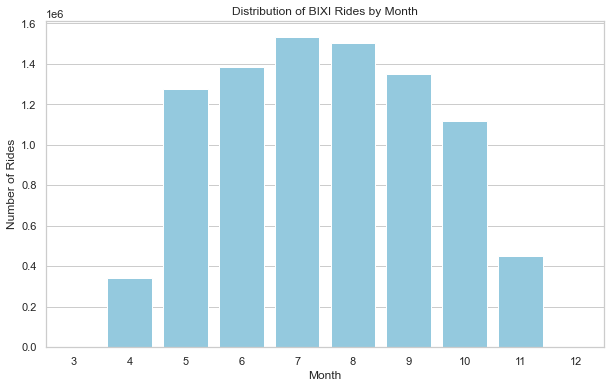

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'STARTTIMEMS' is the column containing the start time of rides
# Convert milliseconds to datetime
df['STARTTIMEDT'] = pd.to_datetime(df['STARTTIMEMS'], unit='ms')

# Extract month from datetime
df['month'] = df['STARTTIMEDT'].dt.month

# Count the number of rides for each month
ride_counts = df['month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=ride_counts.index, y=ride_counts.values, color='skyblue')
plt.title('Distribution of BIXI Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

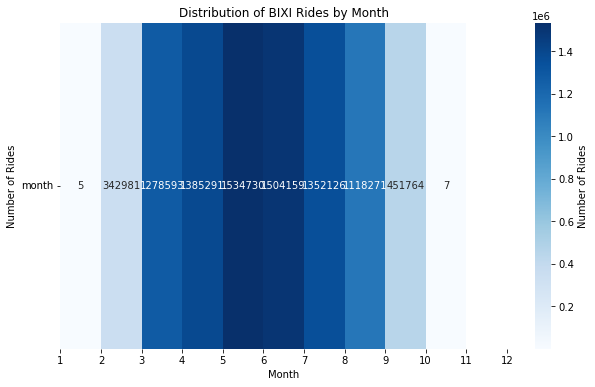

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'STARTTIMEMS' is the column containing the start time of rides
# Convert milliseconds to datetime
df['STARTTIMEDT'] = pd.to_datetime(df['STARTTIMEMS'], unit='ms')

# Extract month from datetime
df['month'] = df['STARTTIMEDT'].dt.month

# Count the number of rides for each month
ride_counts = df['month'].value_counts().sort_index()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ride_counts.to_frame().T, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Number of Rides'})
plt.title('Distribution of BIXI Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(0, 12), labels=[str(i) for i in range(1, 13)])
plt.yticks(rotation=0)
plt.show()


In [25]:
print('month:\n', df.month.value_counts(sort=False))

month:
 3           5
4      342981
5     1278593
6     1385291
7     1534730
8     1504159
9     1352126
10    1118271
11     451764
12          7
Name: month, dtype: int64


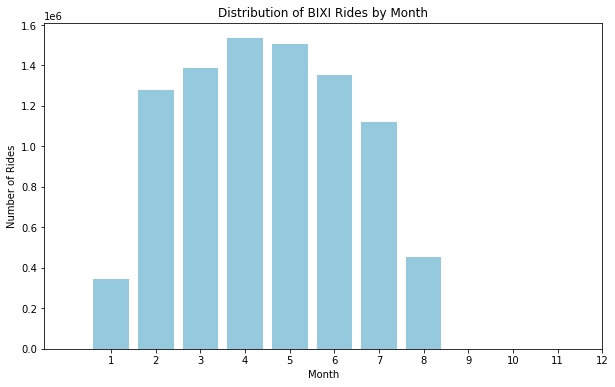

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'STARTTIMEMS' is the column containing the start time of rides
# Convert milliseconds to datetime
df['STARTTIMEDT'] = pd.to_datetime(df['STARTTIMEMS'], unit='ms')

# Extract month from datetime
df['month'] = df['STARTTIMEDT'].dt.month

# Count the number of rides for each month
ride_counts = df['month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=ride_counts.index, y=ride_counts.values, color='skyblue')
plt.title('Distribution of BIXI Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
plt.show()


In [26]:
print('day:\n', df.day.value_counts(sort=False))

day:
 1     308147
2     307373
3     323122
4     314783
5     313761
6     312522
7     309537
8     284490
9     274085
10    311699
11    324172
12    289074
13    283450
14    321807
15    332362
16    276009
17    274970
18    229537
19    239413
20    280284
21    273634
22    289040
23    264207
24    290240
25    302646
26    289243
27    254177
28    298057
29    311635
30    307682
31    176769
Name: day, dtype: int64


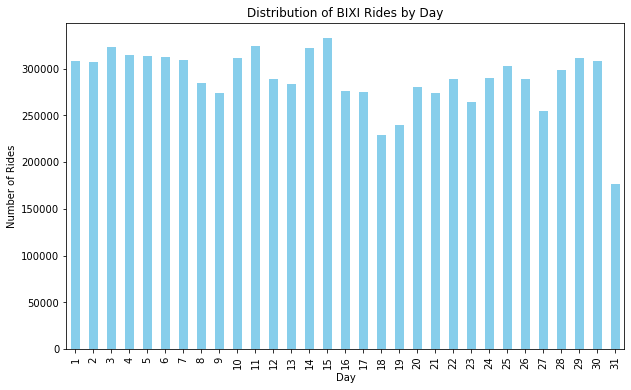

In [37]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'day' is the column you want to visualize
day_counts = df['day'].value_counts(sort=False)

# Plotting
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of BIXI Rides by Day')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.show()


In [27]:
print('hour:\n', df.hour.value_counts(sort=False))

hour:
 0     492375
1     403128
2     348584
3     291502
4     204815
5     143172
6     101018
7      80826
8      39020
9      38739
10     93191
11    252582
12    455746
13    338841
14    319413
15    394142
16    479101
17    496790
18    514920
19    580439
20    706606
21    849925
22    741224
23    601828
Name: hour, dtype: int64


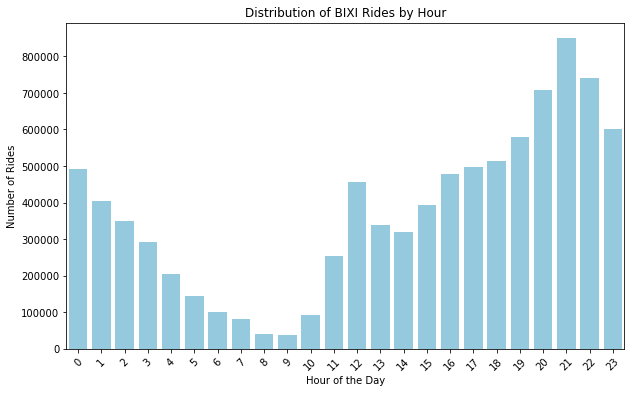

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'STARTTIMEMS' is the column containing the start time of rides
# Convert milliseconds to datetime
df['STARTTIMEDT'] = pd.to_datetime(df['STARTTIMEMS'], unit='ms')

# Extract hour from datetime
df['hour'] = df['STARTTIMEDT'].dt.hour

# Count the number of rides for each hour
hourly_ride_counts = df['hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_ride_counts.index, y=hourly_ride_counts.values, color='skyblue')
plt.title('Distribution of BIXI Rides by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()


In [28]:
print('Temp (°C):\n', df.avg_temperature.value_counts())

Temp (°C):
  19.14    190816
 20.85    164508
 20.05    153979
 20.39    148416
 19.10    136544
           ...  
 9.15       3031
-3.90          6
 0.89          5
 6.85          2
-5.75          1
Name: avg_temperature, Length: 178, dtype: int64


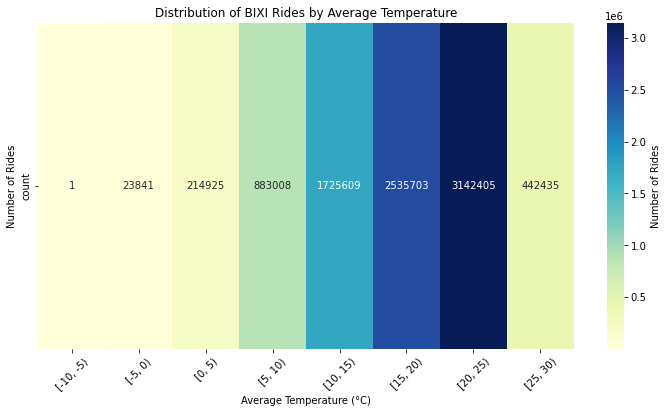

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Set the size of the temperature bins based on your data distribution
temp_bins = pd.cut(df['avg_temperature'], bins=range(-10, 40, 5), right=False)

# Create a DataFrame with the counts for each temperature bin
temp_counts = pd.crosstab(index=temp_bins, columns='count')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(temp_counts.T, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Rides'})
plt.title('Distribution of BIXI Rides by Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()


In [29]:
print('start_station_code:\n', df.ENDSTATIONNAME.value_counts())

start_station_code:
 Métro Mont-Royal (Rivard / du Mont-Royal)          72938
de la Commune / Place Jacques-Cartier              65913
Marquette / du Mont-Royal                          55967
de la Commune / St-Sulpice                         52200
du Mont-Royal / Clark                              49583
                                                   ...  
Grenet / Poirier                                       8
Quentin Gouvier (Duluth  / St-Denis)                   8
Square Nelligan (des Appalaches / Alexis-Nihon)        6
Gare Lachine (Sir George Simpson / 48e avenue)         3
Dixie / 53e avenue                                     2
Name: ENDSTATIONNAME, Length: 867, dtype: int64


In [30]:
print('duration_sec:\n', df.TRIPDURATION.value_counts())

duration_sec:
 385.607     26
447.114     26
369.707     24
313.735     24
580.941     24
            ..
4994.008     1
2248.483     1
5570.518     1
2160.246     1
2873.591     1
Name: TRIPDURATION, Length: 2302474, dtype: int64


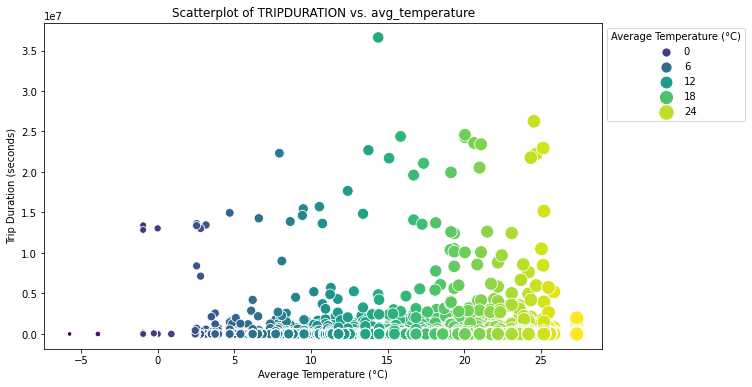

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_temperature', y='TRIPDURATION', hue='avg_temperature', size='avg_temperature', palette='viridis', sizes=(20, 200))
plt.title('Scatterplot of TRIPDURATION vs. avg_temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Trip Duration (seconds)')
plt.legend(title='Average Temperature (°C)', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


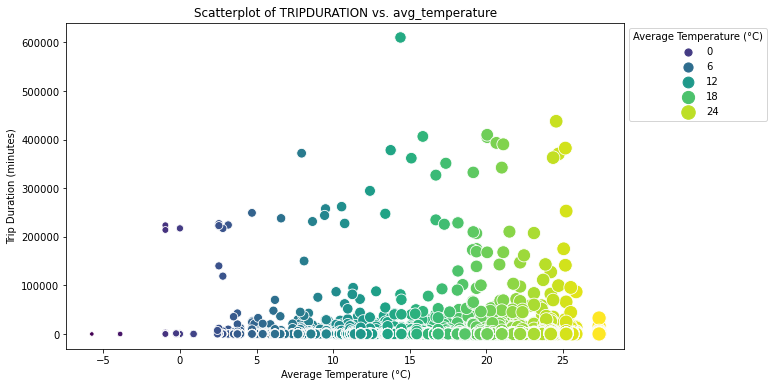

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Convert TRIPDURATION from seconds to minutes
df['TRIPDURATION_minutes'] = df['TRIPDURATION'] / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_temperature', y='TRIPDURATION_minutes', hue='avg_temperature', size='avg_temperature', palette='viridis', sizes=(20, 200))
plt.title('Scatterplot of TRIPDURATION vs. avg_temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Trip Duration (minutes)')
plt.legend(title='Average Temperature (°C)', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


<h2> 6. Feature Engineering

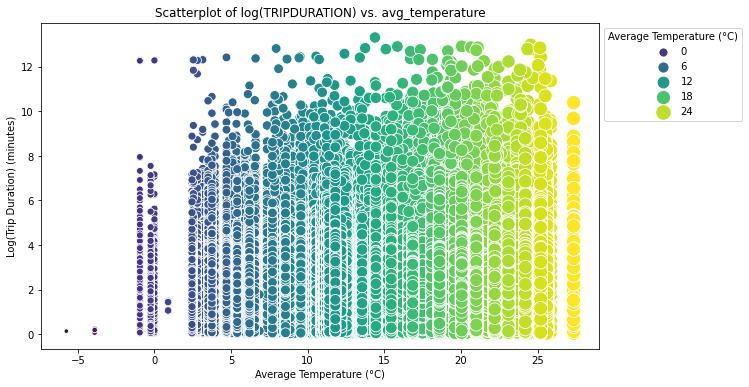

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Convert TRIPDURATION from seconds to minutes
df['TRIPDURATION_minutes'] = df['TRIPDURATION'] / 60

# Create a new column with log-transformed trip duration
df['TRIPDURATION_log'] = np.log1p(df['TRIPDURATION_minutes'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_temperature', y='TRIPDURATION_log', hue='avg_temperature', size='avg_temperature', palette='viridis', sizes=(20, 200))
plt.title('Scatterplot of log(TRIPDURATION) vs. avg_temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Log(Trip Duration) (minutes)')
plt.legend(title='Average Temperature (°C)', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


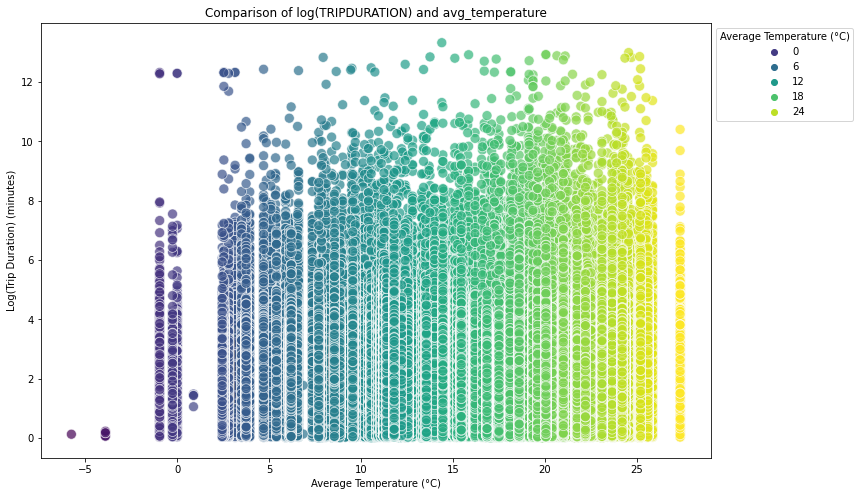

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Convert TRIPDURATION from seconds to minutes
df['TRIPDURATION_minutes'] = df['TRIPDURATION'] / 60

# Create a new column with log-transformed trip duration
df['TRIPDURATION_log'] = np.log1p(df['TRIPDURATION_minutes'])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='avg_temperature', y='TRIPDURATION_log', hue='avg_temperature', palette='viridis', s=100, alpha=0.7)
plt.title('Comparison of log(TRIPDURATION) and avg_temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Log(Trip Duration) (minutes)')
plt.legend(title='Average Temperature (°C)', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


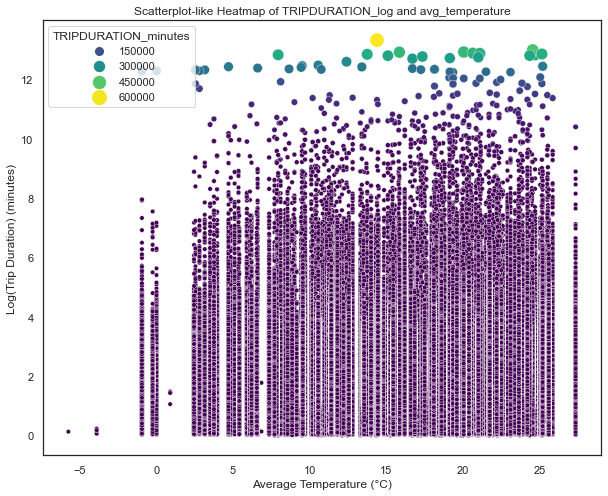

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Convert TRIPDURATION from seconds to minutes
df['TRIPDURATION_minutes'] = df['TRIPDURATION'] / 60

# Create a new column with log-transformed trip duration
df['TRIPDURATION_log'] = np.log1p(df['TRIPDURATION_minutes'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a scatterplot-like heatmap
sns.scatterplot(data=df, x='avg_temperature', y='TRIPDURATION_log', hue='TRIPDURATION_minutes', palette='viridis', size='TRIPDURATION_minutes', sizes=(20, 200))

# Set the title and labels
plt.title('Scatterplot-like Heatmap of TRIPDURATION_log and avg_temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Log(Trip Duration) (minutes)')

# Show the colorbar
plt.colorbar(label='Trip Duration (minutes)')

# Show the plot
plt.show()


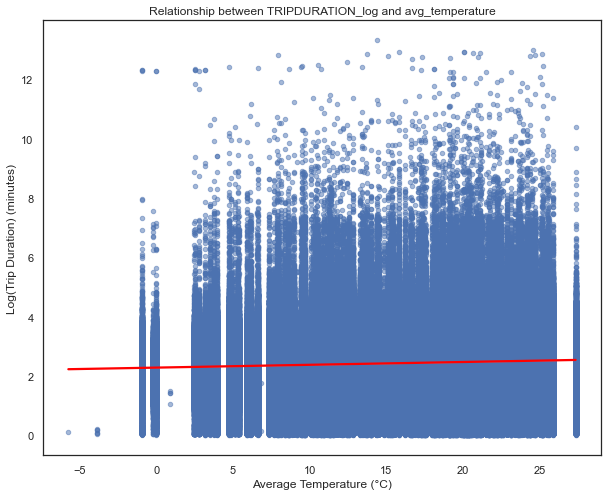

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Convert TRIPDURATION from seconds to minutes
df['TRIPDURATION_minutes'] = df['TRIPDURATION'] / 60

# Create a new column with log-transformed trip duration
df['TRIPDURATION_log'] = np.log1p(df['TRIPDURATION_minutes'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a scatterplot with a regression line
sns.regplot(data=df, x='avg_temperature', y='TRIPDURATION_log', scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})

# Set the title and labels
plt.title('Relationship between TRIPDURATION_log and avg_temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Log(Trip Duration) (minutes)')

# Show the plot
plt.show()


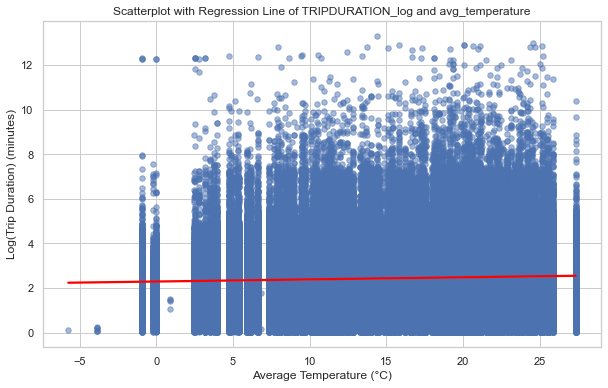

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Convert TRIPDURATION from seconds to minutes
df['TRIPDURATION_minutes'] = df['TRIPDURATION'] / 60

# Create a new column with log-transformed trip duration
df['TRIPDURATION_log'] = np.log1p(df['TRIPDURATION_minutes'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatterplot with a regression line
sns.set_theme(style="whitegrid")
sns.regplot(data=df, x='avg_temperature', y='TRIPDURATION_log', scatter_kws={'s': 30, 'alpha': 0.5}, line_kws={'color': 'red'})

# Set the title and labels
plt.title('Scatterplot with Regression Line of TRIPDURATION_log and avg_temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Log(Trip Duration) (minutes)')

# Show the plot
plt.show()


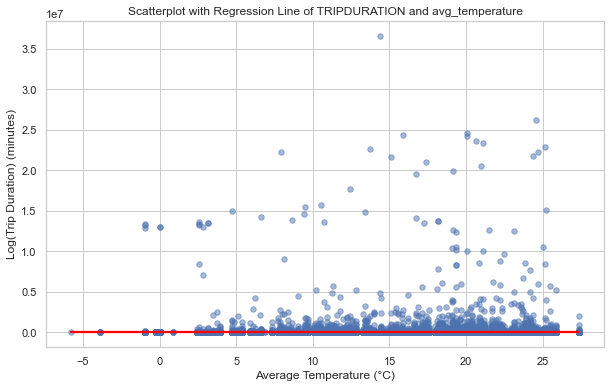

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Convert TRIPDURATION from seconds to minutes
df['TRIPDURATION_minutes'] = df['TRIPDURATION'] / 60



# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatterplot with a regression line
sns.set_theme(style="whitegrid")
sns.regplot(data=df, x='avg_temperature', y='TRIPDURATION', scatter_kws={'s': 30, 'alpha': 0.5}, line_kws={'color': 'red'})

# Set the title and labels
plt.title('Scatterplot with Regression Line of TRIPDURATION and avg_temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Log(Trip Duration) (minutes)')

# Show the plot
plt.show()


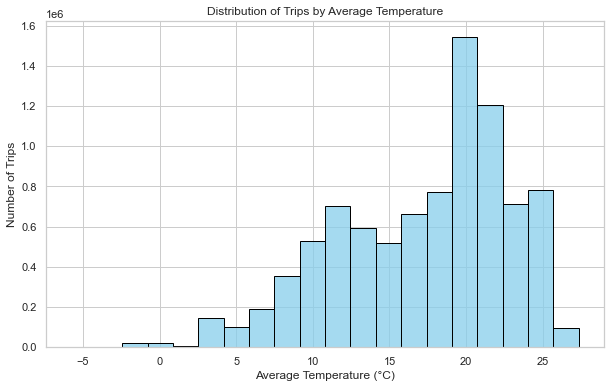

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_temperature', bins=20, kde=False, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Trips by Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Trips')

# Show the plot
plt.show()
